In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

## Riddler 2/2/18

https://fivethirtyeight.com/features/will-the-grasshopper-land-in-your-yard/

## Express

### Problem Statement

'From Diarmuid Early, a daily dose puzzle:

You and your spouse each take two gummy vitamins every day. You share a single bottle of 60 vitamins, which come in two flavors. You each prefer a different flavor, but it seems childish to fish out two of each type (but not to take gummy vitamins). So you just take the first four that fall out and then divide them up according to your preferences. For example, if there are two of each flavor, you and your spouse get the vitamins you prefer, but if three of your preferred flavor come out, you get two of the ones you like and your spouse will get one of each.

The question is, on average, what percentage of the vitamins you take are the flavor you prefer? (Assume that the bottle starts out with a 50-50 split between flavors, and that the four selected each day are selected uniformly at random.)'

### Solution

The method below simulates pouring out 4 random vitamins from a 50-50 split of a bottle with 60 vitamins. It also has the pour size and bottle size as inputs to try different dose and bottle sizes. The simulation is run for 100,000 bottles to see the asymptotic behavior of the probability distribution.

In [15]:

def pilsim(pillsize=60,poursize=4,sims=100000):
        
    prefvec=[]
    runprefvec=[]
    dosesize=int(poursize/2)
    
    for i in range(sims):
        vitvec=random.sample([True]*int(pillsize/2)+[False]*int(pillsize/2),pillsize)
        vits=0
        preftot=0
        while len(vitvec)>0:
            rest=min(4,len(vitvec))
            pour=vitvec[:rest]
            vitvec=vitvec[rest:]
            pref=min(dosesize,sum(pour))
            preftot+=pref
            vits+=dosesize
            prefrat=preftot/vits
        
        prefvec=prefvec+[prefrat]
        runprefvec=runprefvec+[np.mean(prefvec)]
        
    return(prefvec,runprefvec)

In [4]:
prefvec,runvec=pilsim()

The plot below shows how the distribution changes over the first 1,000 simulations. The single bottle probabilities range from 0.7 to 0.94.

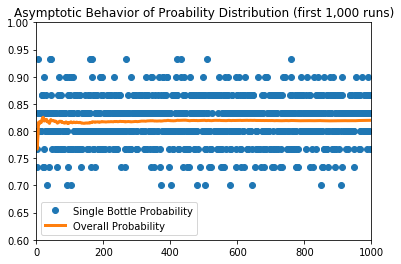

In [14]:

plt.plot(prefvec[:1000],'o')
plt.plot(runvec[:1000],lw=3)
plt.axis([0,1000,0.6,1])
plt.title('Asymptotic Behavior of Proability Distribution (first 1,000 runs)')
plt.legend(['Single Bottle Probability','Overall Probability'])

After 100,000 simulations, we see the distribution of the preferred vitamins. The mean value hovers around ~.8189.

Text(0.5,1,'Probability Distribution of Preferred Vitamins')

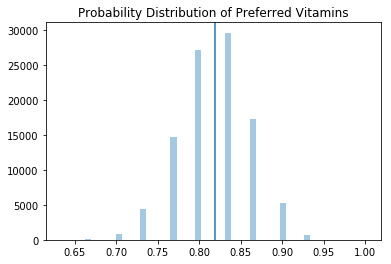

In [13]:
sns.distplot(prefvec,kde=False)
plt.axvline(x=runvec[-1])
plt.title('Probability Distribution of Preferred Vitamins')

In [6]:
runvec[-1]

0.81890300000000005

## Classic 

### Problem Statement

'From Dan Schauer, inspired by a recent physics paper and a blog post by Sabine Hossenfelder, a difficult problem of insects and landscaping:

A grasshopper lands somewhere randomly on your lawn, which has an area of 1 square meter. As soon as it lands, it jumps 30 centimeters. What shape should your lawn be to maximize the chances that the grasshopper will still be on the lawn after the 30-centimeter jump? (Hint: It’s not a circle.) This is a visual problem, so submitting a link to your shape may be best, although descriptions are also fine.

Extra credit: What if the grasshopper jumps X centimeters instead?'

In [26]:
radius=.3
area=1
ranger=3*area
x=tuple(np.random.uniform(0,ranger,size=2))
x

(0.51744127778716731, 1.5088391002675214)

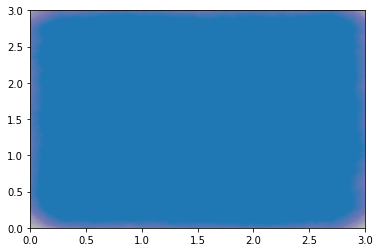

In [66]:
ax=plt.gca()
ax.cla()
ax.set_xlim((0,3*area))
ax.set_ylim((0,3*area))

for i in range(10000):
    loc=np.random.uniform(0,ranger,size=2)
    circle1=plt.Circle(loc,radius,alpha=0.005)
    ax.add_artist(circle1)